# Generalized Algorithm 

In [11]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
%matplotlib inline

def _pair_sequence_shift_third(r: int, centre: int, right_edge: int):
    pairs = []
    first, second = (centre - r, centre - r + 1), (centre - r + 1, centre - r + 2)
    pairs.extend([first, second])

    if r == 1:  
        return pairs

    gap = 2 * r - 3
    third = (second[1] + gap, second[1] + gap + 1)
    if third[1] <= right_edge:
        pairs.append(third)

    cur = third[0] - 1
    while len(pairs) < 2 * r and cur >= first[0]:
        pair = (cur, cur + 1)
        if pair not in pairs:
            pairs.append(pair)
        cur -= 1
    return pairs


def galton_box_shifted(n: int, *, draw=False) -> QuantumCircuit:
    total_q = 2 * n + 2
    data_q = 2 * n + 1
    centre = n + 1
    right = data_q
    anc = 0

    qc = QuantumCircuit(total_q, data_q)

    
    qc.x(centre)

    # Resets 1 to n-1
    for r in range(1, n):
        qc.reset(anc)
        qc.h(anc)

        pairs = _pair_sequence_shift_third(r, centre, right)

        for i, (a, b) in enumerate(pairs):
            qc.cswap(anc, a, b)

            
            if i < len(pairs) - 1:
                next_a, _ = pairs[i + 1]
                cx_control = b if next_a > a else a
                qc.cx(cx_control, anc)

    
    qc.reset(anc)
    qc.h(anc)

    i = 0
    while i <= data_q - 3:
        qc.cswap(anc, i + 1, i + 2)
        qc.cx(i + 2, anc)
        qc.cswap(anc, i + 2, i + 3)
        if i + 4 < data_q:
            qc.cx(i + 3, anc)
        i += 2
    if draw:
        qc.draw('mpl', style='clifford')

    # Measure all data qubits
    for i in range(1, data_q + 1):
        qc.measure(i, i - 1)

   

    return qc




# For layer 4 

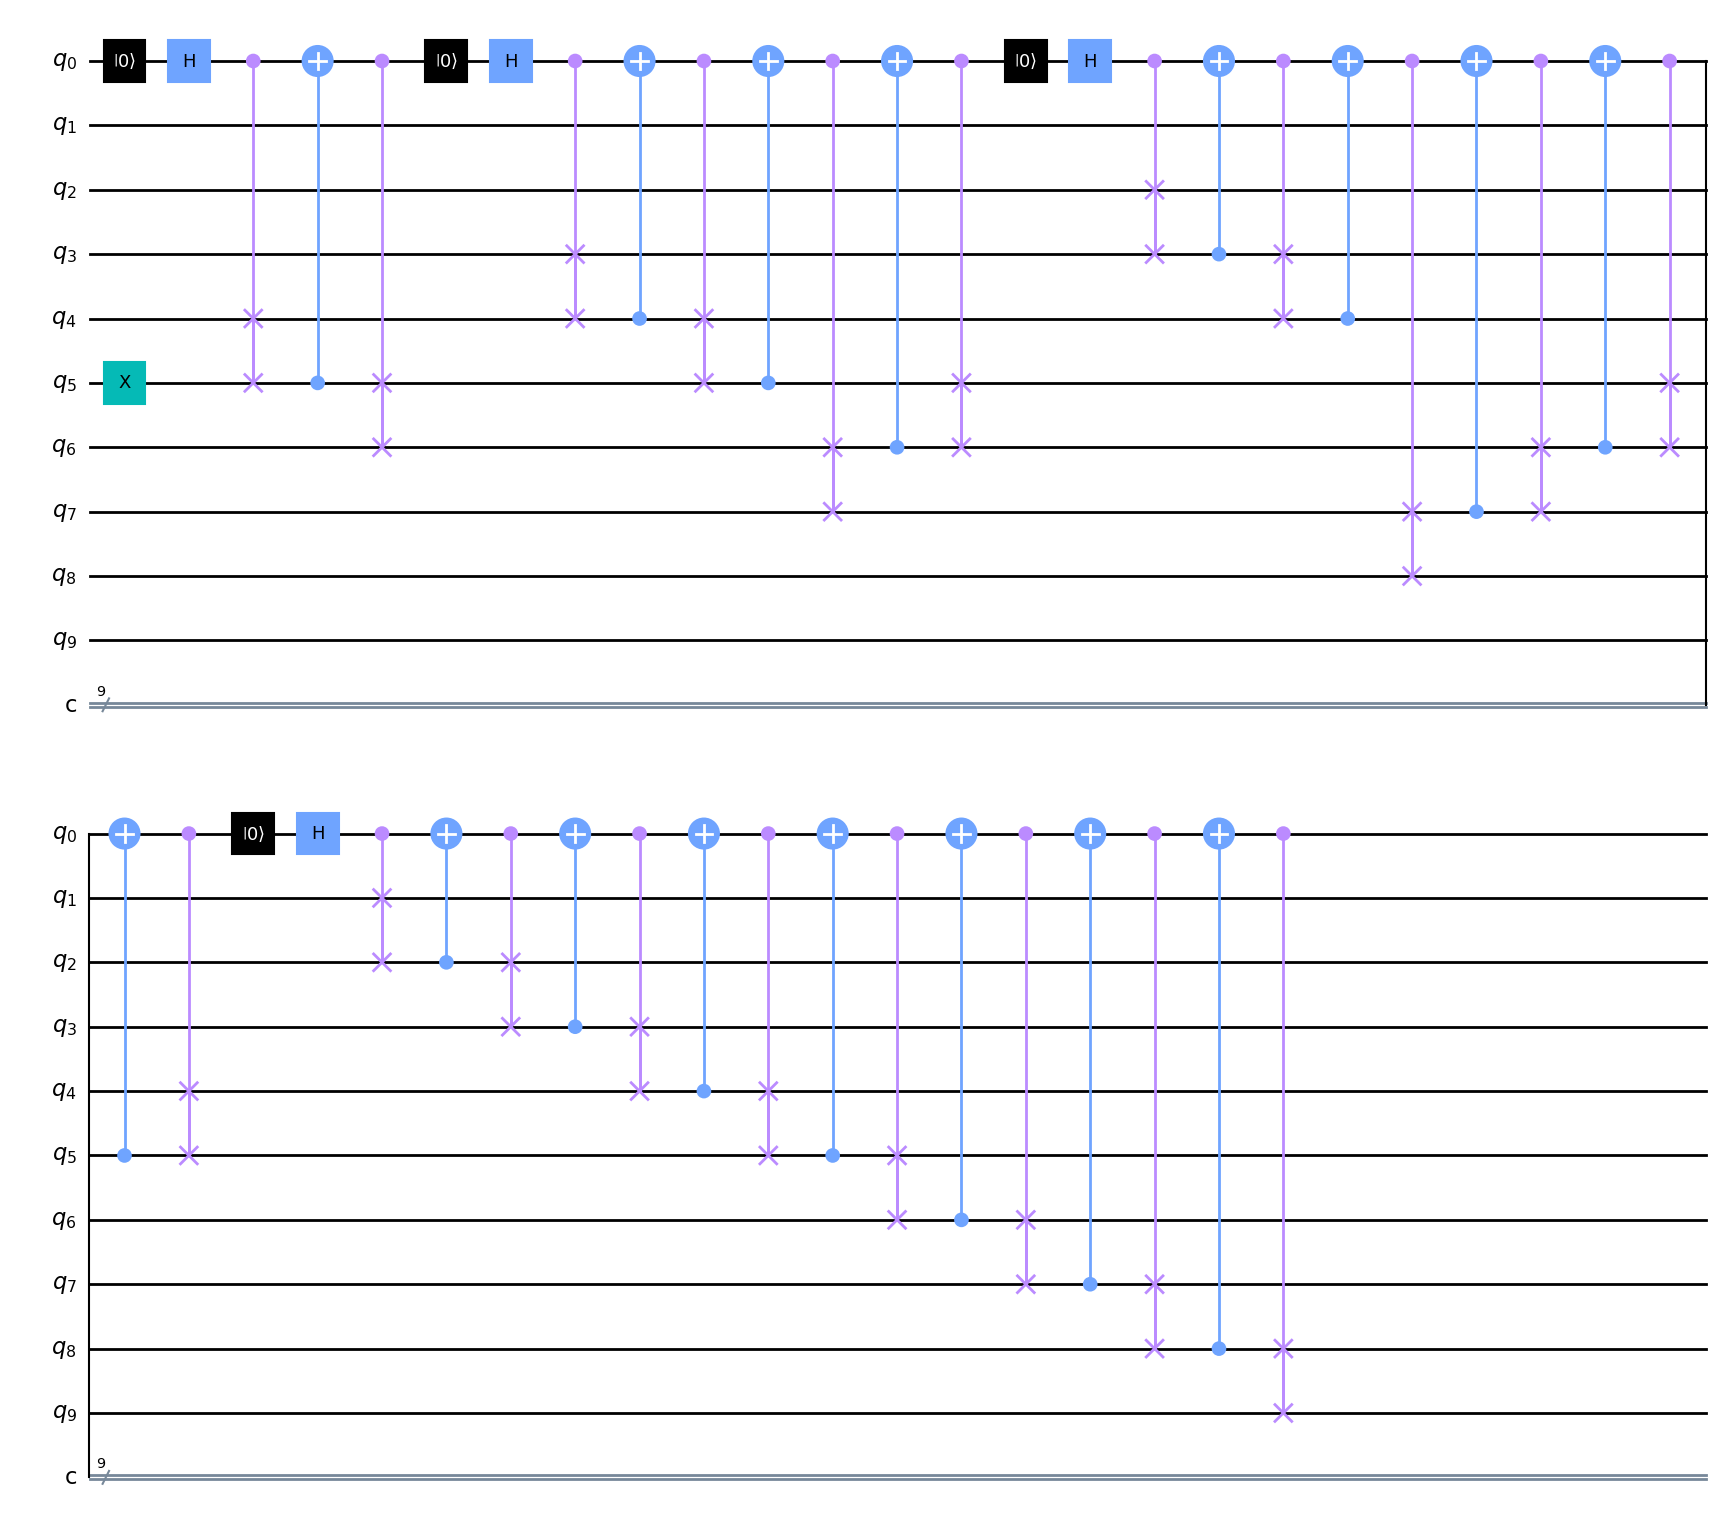

In [12]:
galton_box_shifted(4, draw=True)

Measurement results (bitstrings):
000010000 : 3849
000000100 : 2487
001000000 : 2442
100000000 : 620
000000001 : 602


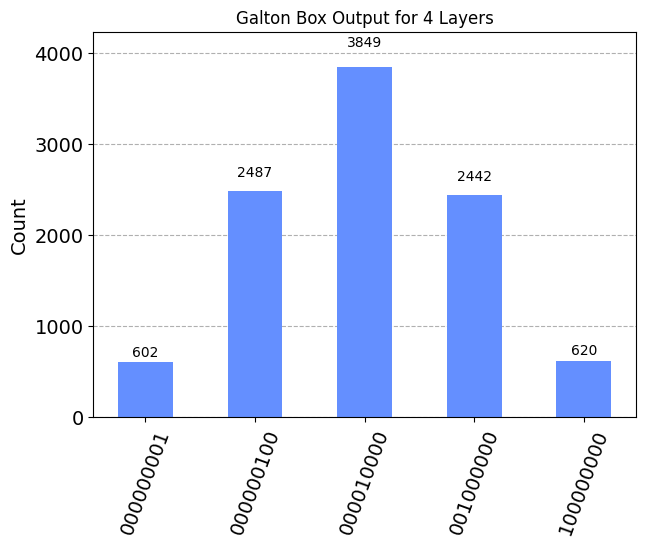

In [13]:
n_layers = 4
qc = galton_box_shifted(n_layers)

backend = Aer.get_backend('qasm_simulator')
compiled = transpile(qc, backend)
job = backend.run(compiled, shots=10_000)
counts = job.result().get_counts()

# Print and plot
print("Measurement results (bitstrings):")
for bitstring, count in sorted(counts.items(), key=lambda x: x[1], reverse=True):
    print(f"{bitstring} : {count}")

plot_histogram(counts)
plt.title(f"Galton Box Output for {n_layers} Layers")
plt.show()


# for Layer 5

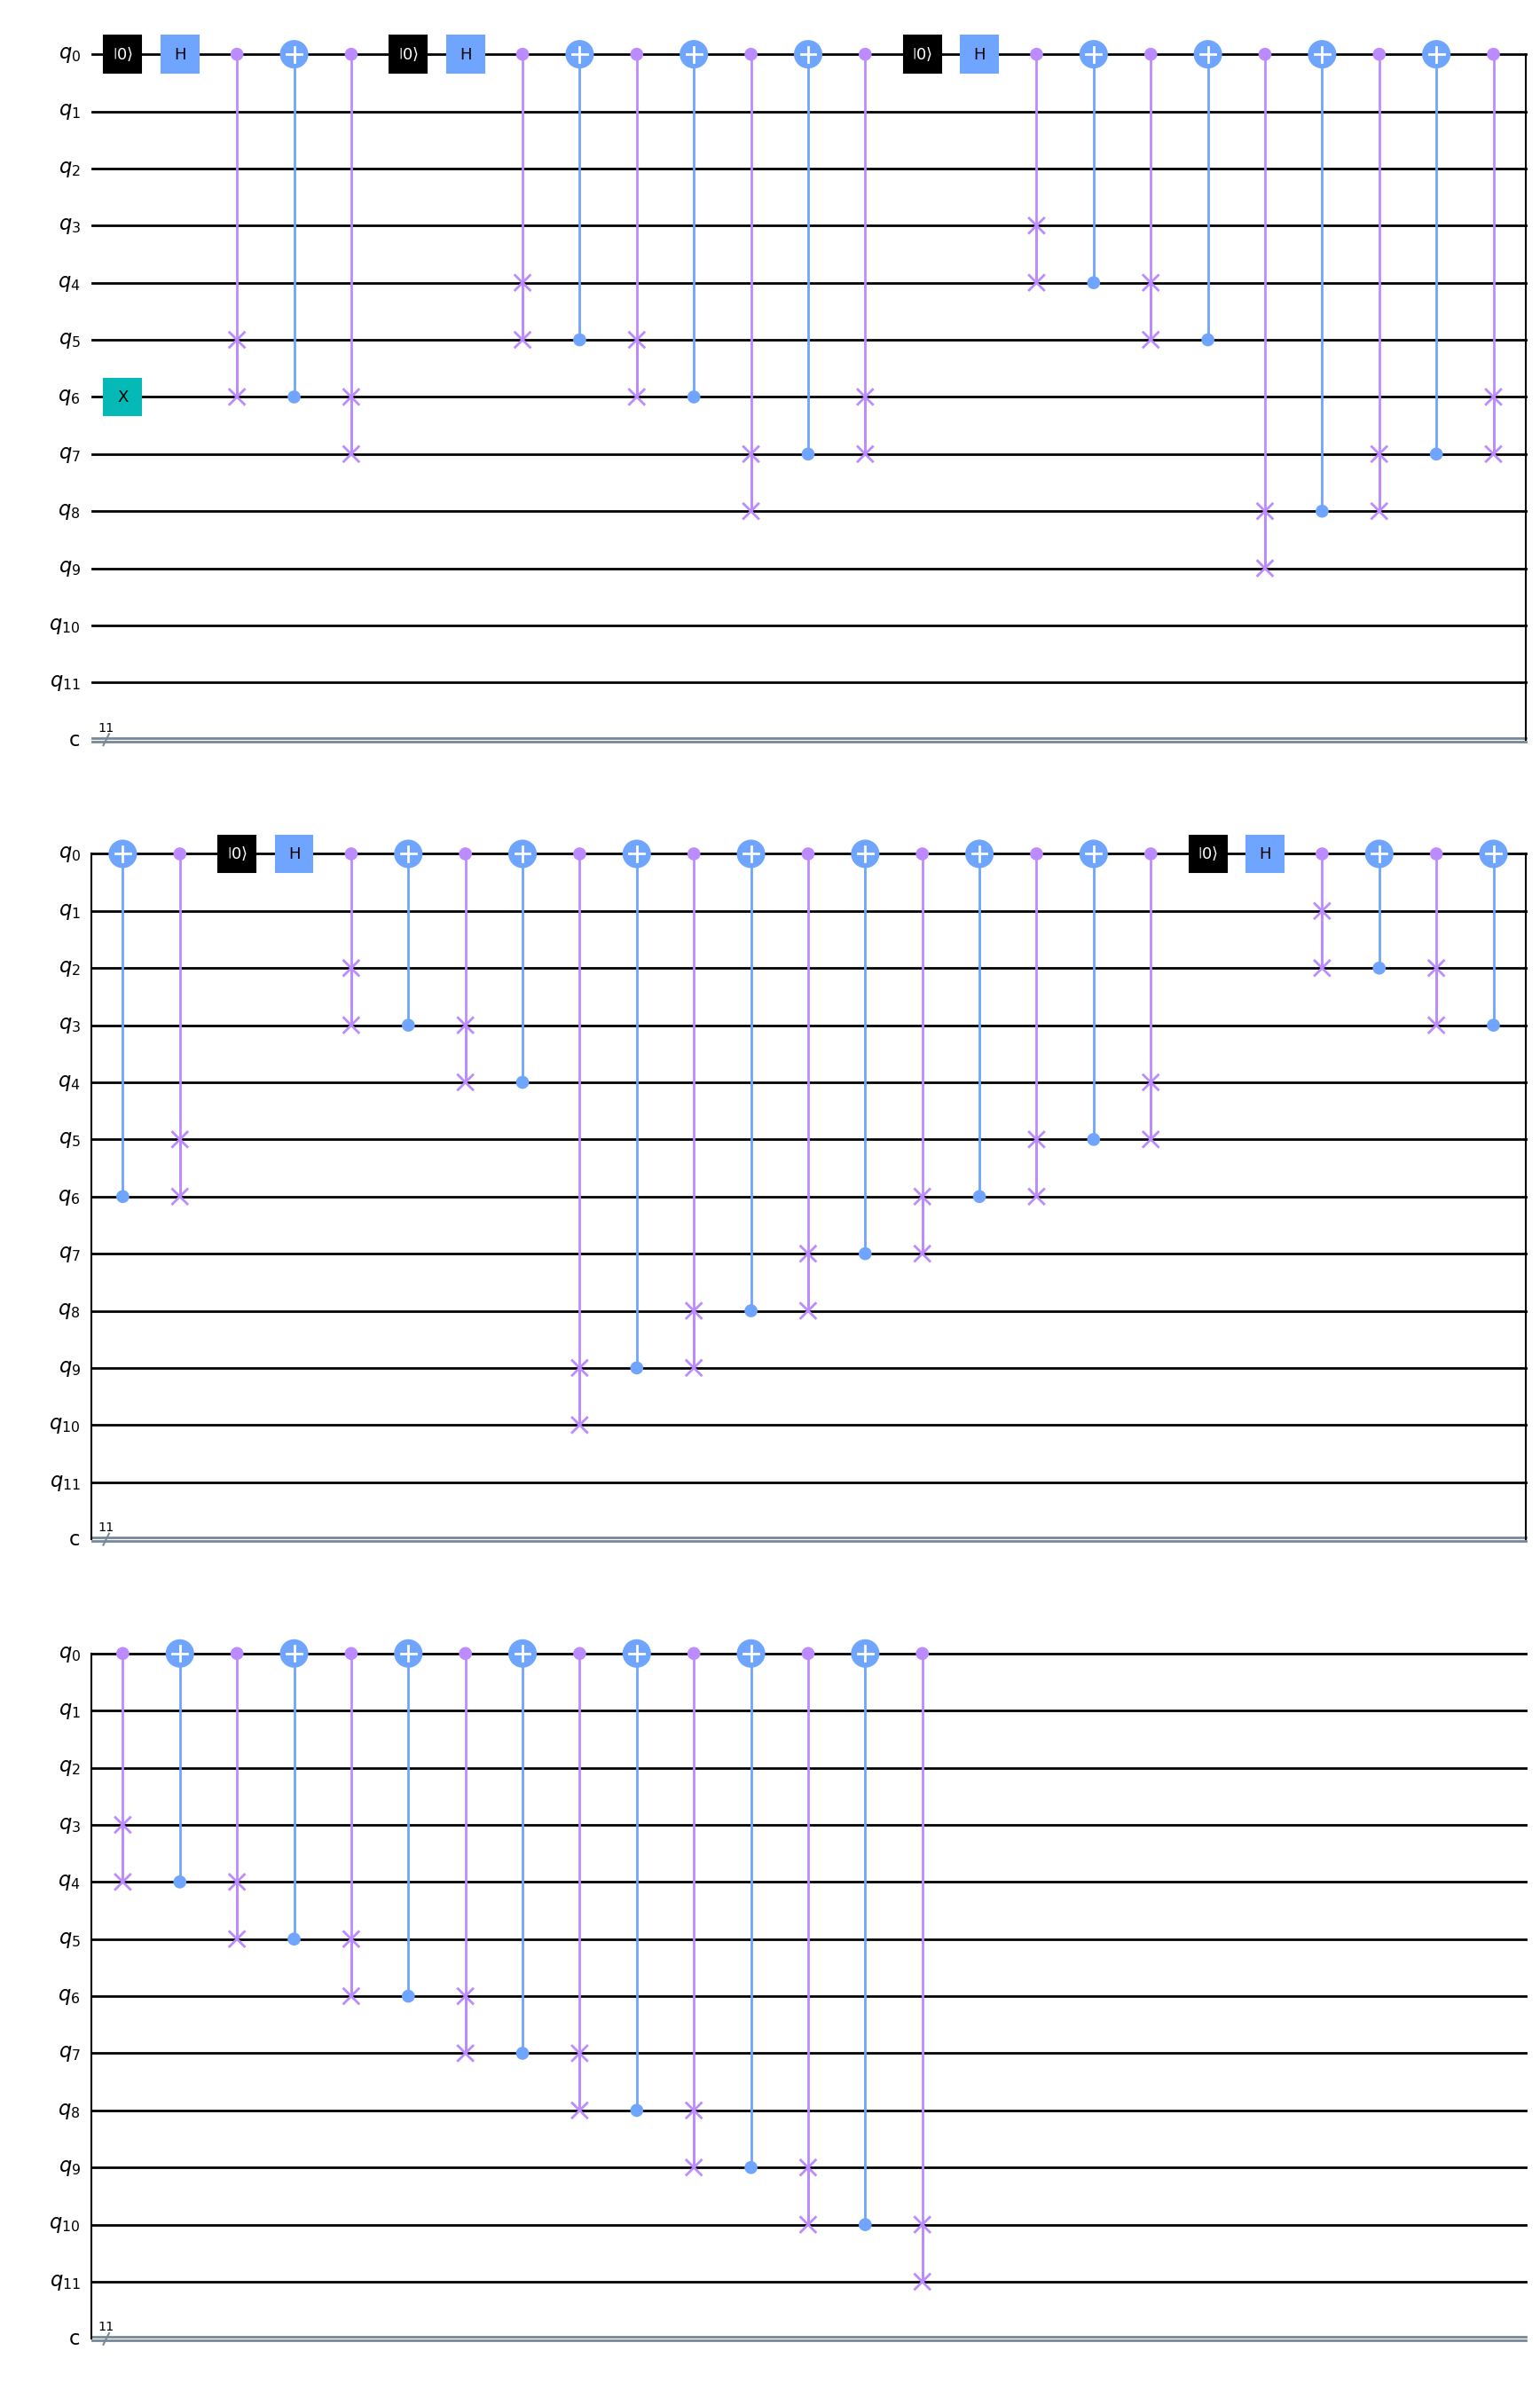

In [14]:
galton_box_shifted(5, draw=True)

Measurement results (bitstrings):
00001000000 : 3210
00000010000 : 3104
00000000100 : 1583
00100000000 : 1497
00000000001 : 309
10000000000 : 297


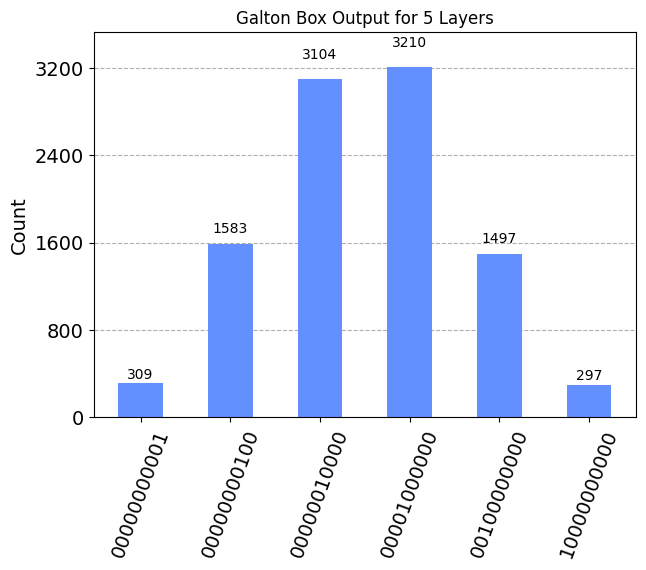

In [15]:
n_layers = 5
qc = galton_box_shifted(n_layers)

backend = Aer.get_backend('qasm_simulator')
compiled = transpile(qc, backend)
job = backend.run(compiled, shots=10_000)
counts = job.result().get_counts()

# Print and plot
print("Measurement results (bitstrings):")
for bitstring, count in sorted(counts.items(), key=lambda x: x[1], reverse=True):
    print(f"{bitstring} : {count}")

plot_histogram(counts)
plt.title(f"Galton Box Output for {n_layers} Layers")
plt.show()


# for Layer

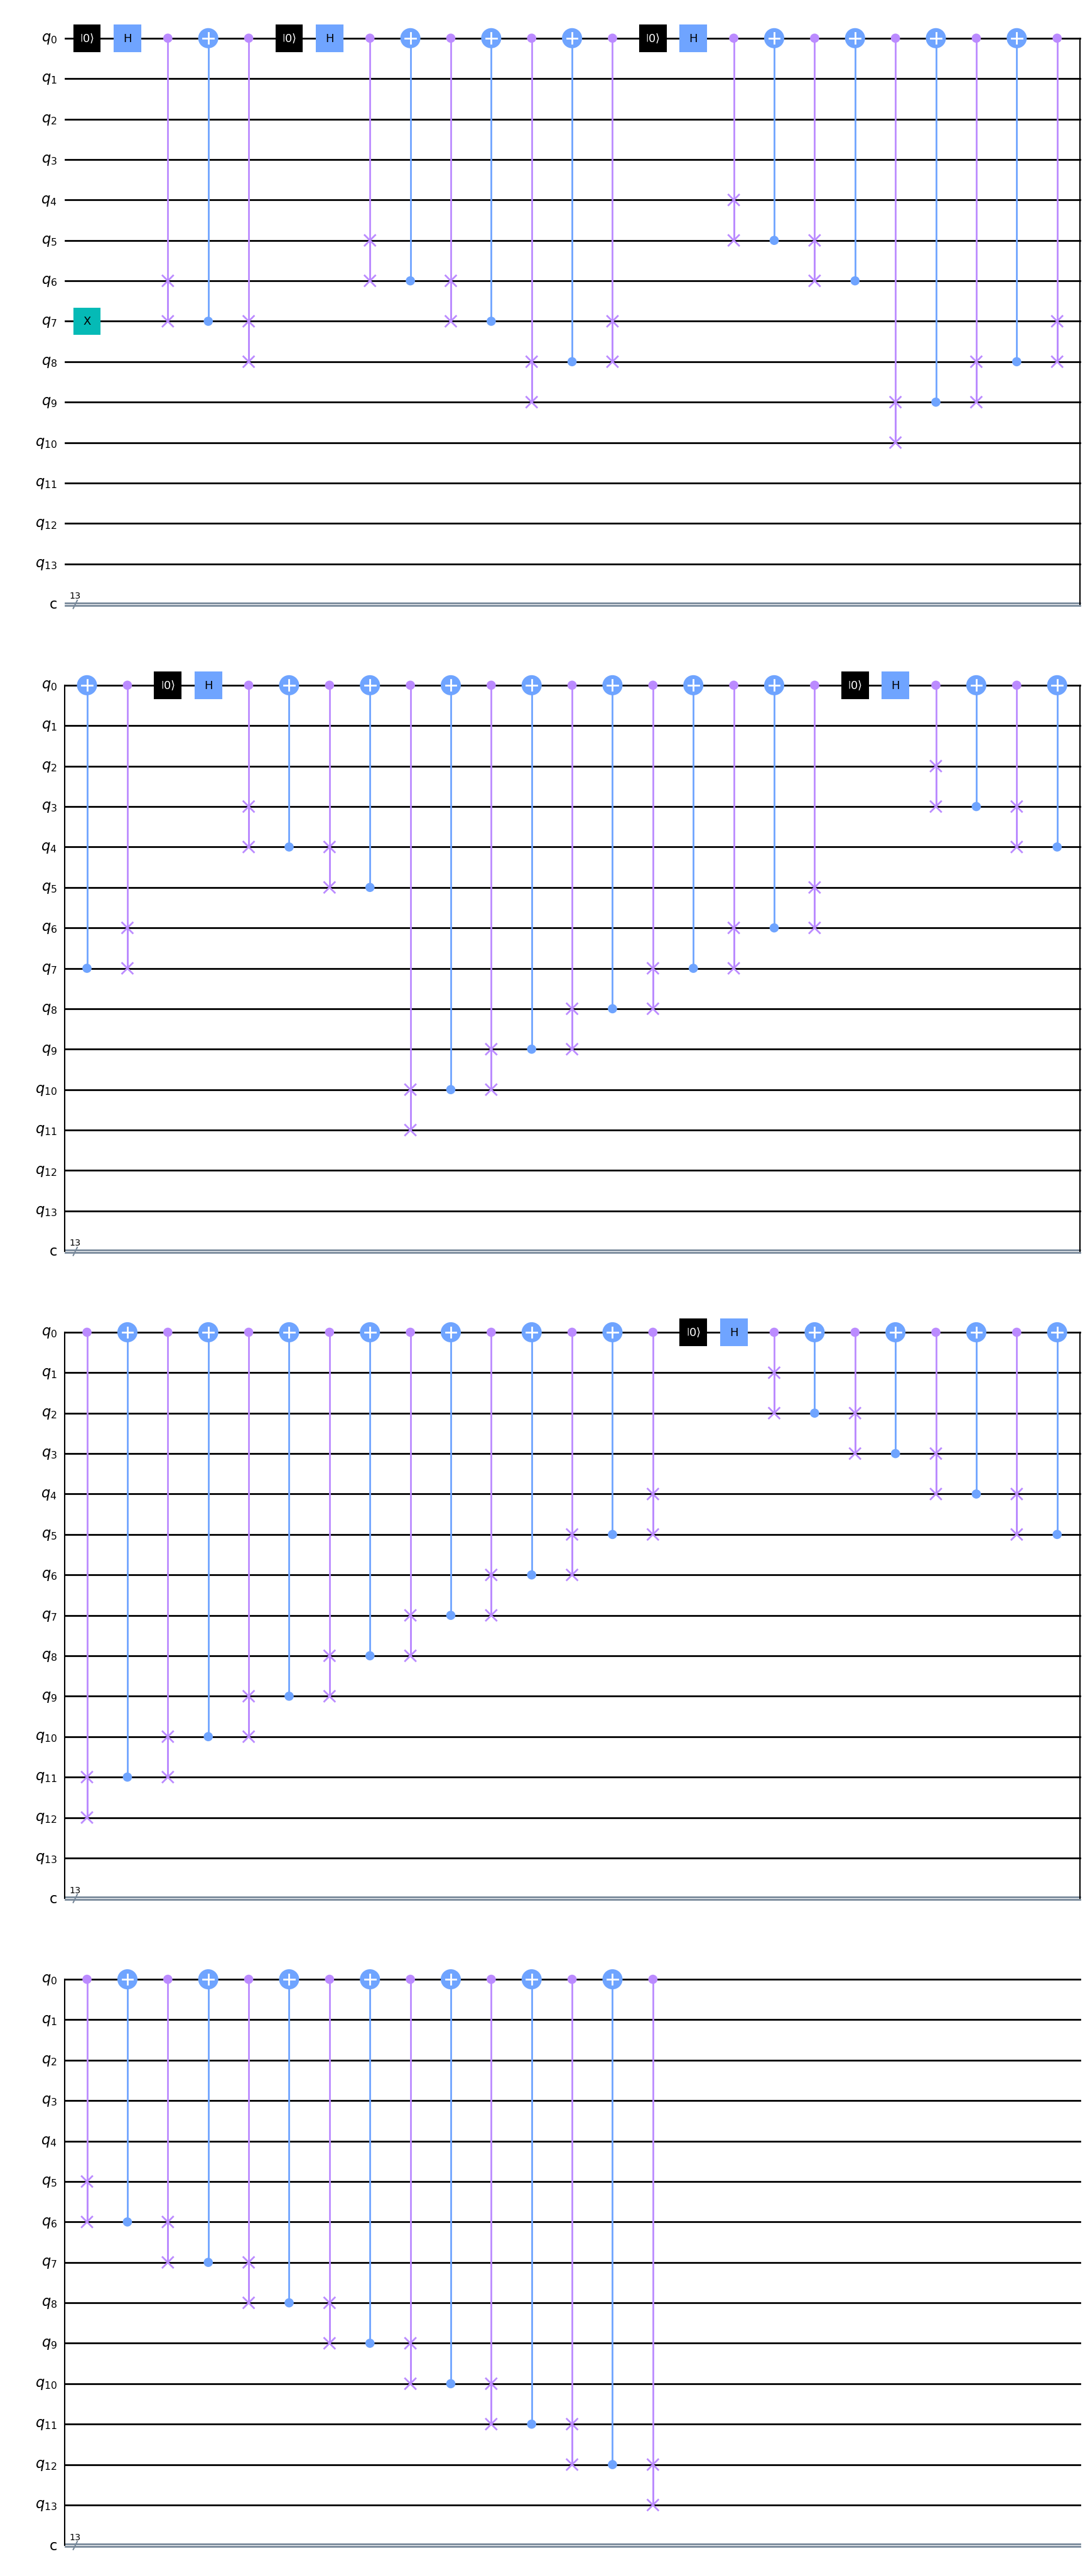

In [16]:
galton_box_shifted(6, draw=True)

Measurement results (bitstrings):
0000001000000 : 3156
0000000010000 : 2353
0000100000000 : 2300
0010000000000 : 975
0000000000100 : 879
1000000000000 : 173
0000000000001 : 164


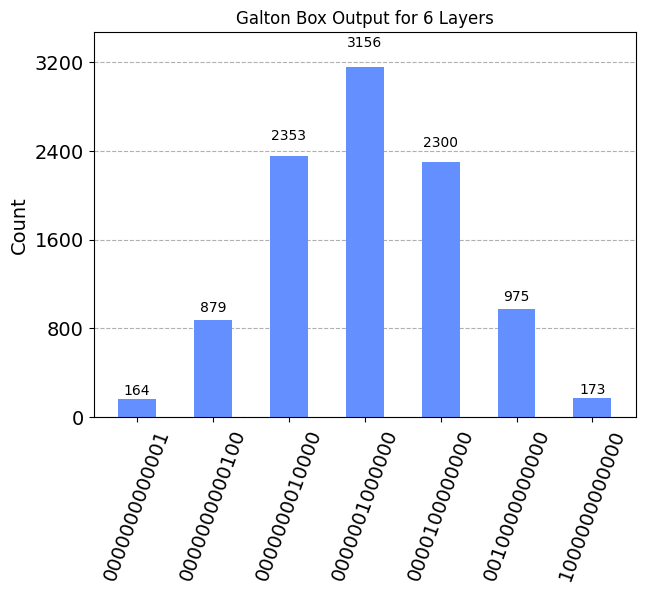

In [17]:
n_layers = 6
qc = galton_box_shifted(n_layers)

backend = Aer.get_backend('qasm_simulator')
compiled = transpile(qc, backend)
job = backend.run(compiled, shots=10_000)
counts = job.result().get_counts()

# Print and plot
print("Measurement results (bitstrings):")
for bitstring, count in sorted(counts.items(), key=lambda x: x[1], reverse=True):
    print(f"{bitstring} : {count}")

plot_histogram(counts)
plt.title(f"Galton Box Output for {n_layers} Layers")
plt.show()
